In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df = pd.read_csv('../data/MTA_Subway_Terminal_On-Time_Performance__2015-2019.csv')
df

,month,line,division,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance
0,2015-01,1,A DIVISION,1,6874,9017,0.762338
1,2015-01,2,A DIVISION,1,2920,6175,0.472874
2,2015-01,3,A DIVISION,1,4004,5834,0.686322
3,2015-01,4,A DIVISION,1,3692,7623,0.484324
4,2015-01,5,A DIVISION,1,3203,6491,0.493452
...,...,...,...,...,...,...,...
1660,2019-12,S Fkln,B DIVISION,2,2072,2092,0.990440
1661,2019-12,S Rock,B DIVISION,1,3379,3528,0.957766
1662,2019-12,S Rock,B DIVISION,2,1497,1544,0.969560
1663,2019-12,Systemwide,Systemwide,1,137946,172004,0.801993


In [4]:
df['date'] = pd.to_datetime(df['month'], format='%Y-%m')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['season'] = df['date'].dt.quarter

df

,month,line,division,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance,date,year,season
0,1,1,A DIVISION,1,6874,9017,0.762338,2015-01-01,2015,1
1,1,2,A DIVISION,1,2920,6175,0.472874,2015-01-01,2015,1
2,1,3,A DIVISION,1,4004,5834,0.686322,2015-01-01,2015,1
3,1,4,A DIVISION,1,3692,7623,0.484324,2015-01-01,2015,1
4,1,5,A DIVISION,1,3203,6491,0.493452,2015-01-01,2015,1
...,...,...,...,...,...,...,...,...,...,...
1660,12,S Fkln,B DIVISION,2,2072,2092,0.990440,2019-12-01,2019,4
1661,12,S Rock,B DIVISION,1,3379,3528,0.957766,2019-12-01,2019,4
1662,12,S Rock,B DIVISION,2,1497,1544,0.969560,2019-12-01,2019,4
1663,12,Systemwide,Systemwide,1,137946,172004,0.801993,2019-12-01,2019,4


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

month                           0
line                            0
division                        0
day_type                        0
num_on_time_trips               0
num_sched_trips                 0
terminal_on_time_performance    0
date                            0
year                            0
season                          0
dtype: int64

In [10]:
df_B_div = df[df['division'] == 'B DIVISION']
df_B_div

,month,line,division,day_type,num_on_time_trips,num_sched_trips,terminal_on_time_performance,date,year,season
8,1,A,B DIVISION,1,4956,7327,0.676402,2015-01-01,2015,1
9,1,B,B DIVISION,1,3164,4120,0.767961,2015-01-01,2015,1
10,1,C,B DIVISION,1,3359,4000,0.839750,2015-01-01,2015,1
11,1,D,B DIVISION,1,4022,5288,0.760590,2015-01-01,2015,1
12,1,E,B DIVISION,1,5453,7894,0.690778,2015-01-01,2015,1
...,...,...,...,...,...,...,...,...,...,...
1658,12,R,B DIVISION,2,1847,2160,0.855093,2019-12-01,2019,4
1659,12,S Fkln,B DIVISION,1,4944,4956,0.997579,2019-12-01,2019,4
1660,12,S Fkln,B DIVISION,2,2072,2092,0.990440,2019-12-01,2019,4
1661,12,S Rock,B DIVISION,1,3379,3528,0.957766,2019-12-01,2019,4


In [11]:
df_b_avg_year = df_B_div.groupby(['year'])['terminal_on_time_performance'].mean()
df_b_avg_year

year
2015    0.742580
2016    0.718011
2017    0.675054
2018    0.660360
2019    0.806203
Name: terminal_on_time_performance, dtype: float64

In [14]:
df_b_avg = df_B_div.groupby(['year', 'month'])['terminal_on_time_performance'].mean()
df_b_avg

year  month
2015  1        0.760141
      2        0.715566
      3        0.756138
      4        0.778490
      5        0.740292
      6        0.738214
      7        0.738674
      8        0.761094
      9        0.748411
      10       0.728637
      11       0.704881
      12       0.740423
2016  1        0.724623
      2        0.737930
      3        0.737284
      4        0.750429
      5        0.747048
      6        0.725479
      7        0.718907
      8        0.732425
      9        0.709611
      10       0.684318
      11       0.684180
      12       0.669389
2017  1        0.677174
      2        0.678608
      3        0.670263
      4        0.673890
      5        0.652220
      6        0.653074
      7        0.700802
      8        0.689352
      9        0.693267
      10       0.687469
      11       0.673270
      12       0.651263
2018  1        0.581791
      2        0.629519
      3        0.678059
      4        0.708534
      5        0.659395
    

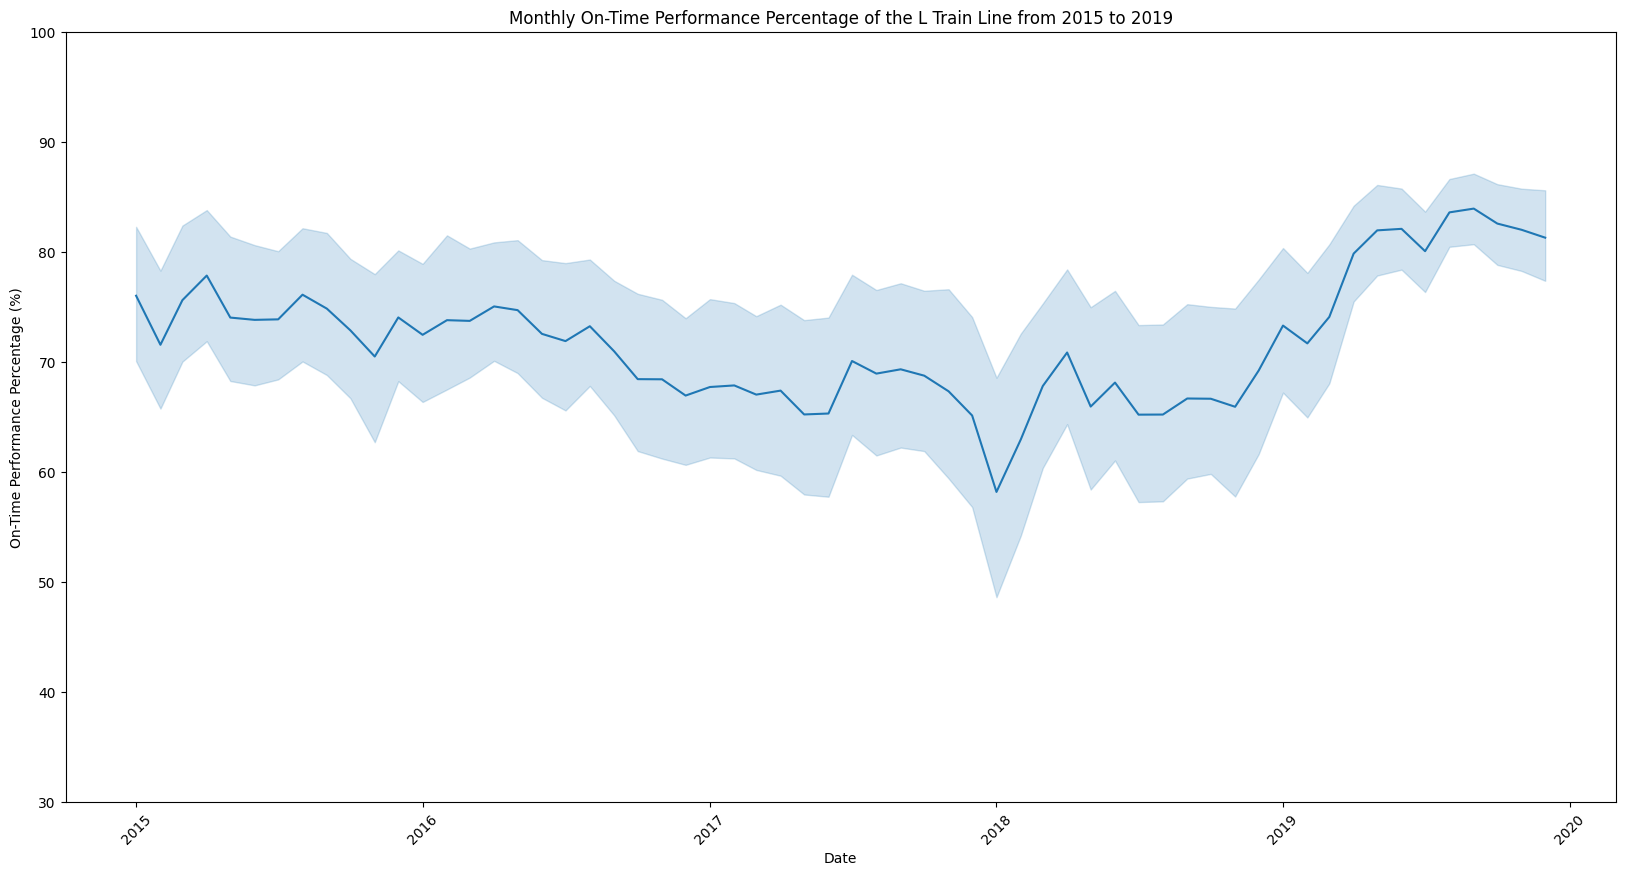

In [13]:
# Create a line chart showing the monthly on-time performance percentage of all letter train line from 2015 to 2019.
plt.figure(figsize=(20,10))
ax = sns.lineplot(x='date', y=df_B_div['terminal_on_time_performance']*100, data=df_B_div)

plt.title('Monthly On-Time Performance Percentage of Letter Train Lines from 2015 to 2019')
plt.xlabel('Date')
plt.ylabel('On-Time Performance Percentage (%)')
plt.xticks(rotation=45)
plt.ylim(30, 100)
plt.show()